To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 5 - Learning Rate, Batch Size, FashionMNIST

## 5.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, BatchNormalization

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
def lenet5():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
    model.add(AveragePooling2D())
    model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(Dense(120, activation='tanh'))
    model.add(Dense(84, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
def lenet5_with_bn_input():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh'))
    model.add(AveragePooling2D())
    model.add(BatchNormalization())
    model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    model.add(AveragePooling2D())
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(120, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(84, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    return model


In [ ]:
# for bn + sgd model
# Candidate learning rates
lrs = [10**i for i in range(-9, 2)]
losses = []

for lr in lrs:
    print('Learning Rate: ', lr)
    model = lenet5_with_bn_input()
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))
    losses.append(history.history['loss'][-1])


Learning Rate:  1e-09
Epoch 1/5
938/938 [==============================] - 18s 13ms/step - loss: 2.7972 - accuracy: 0.0831 - val_loss: 2.7962 - val_accuracy: 0.0794
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 2.7958 - accuracy: 0.0829 - val_loss: 2.8007 - val_accuracy: 0.0785
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 2.7975 - accuracy: 0.0838 - val_loss: 2.7972 - val_accuracy: 0.0792
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 2.7960 - accuracy: 0.0833 - val_loss: 2.7952 - val_accuracy: 0.0793
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 2.7972 - accuracy: 0.0839 - val_loss: 2.7975 - val_accuracy: 0.0790
Learning Rate:  1e-08
Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 3.0972 - accuracy: 0.0713 - val_loss: 3.0887 - val_accuracy: 0.0723
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 3.0953 - accuracy: 0.0720 - val_los

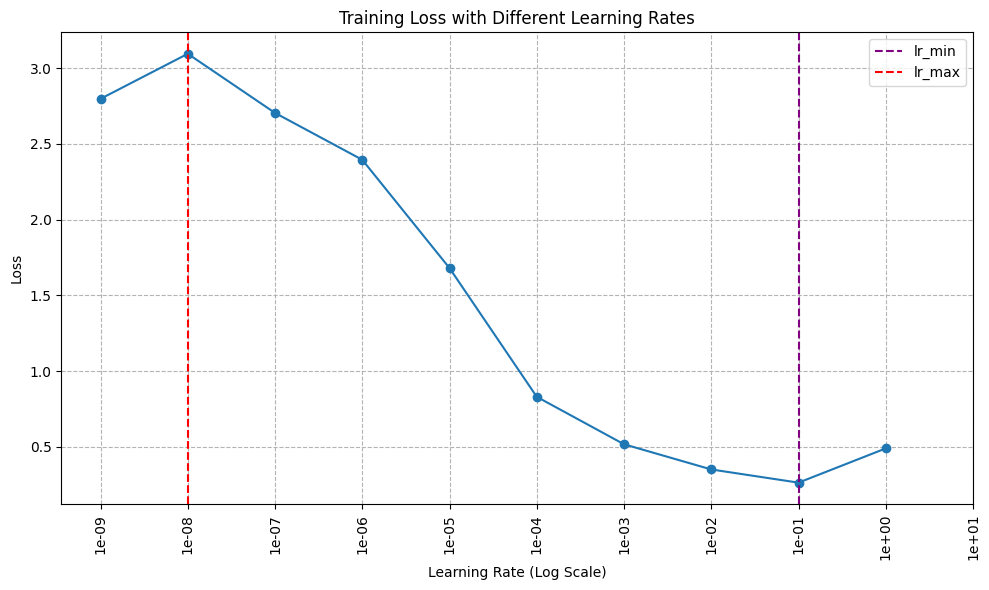

In [ ]:
# for bn + sgd model
# Determine lr_min from the minimum of the losses
lr_min = lrs[losses.index(min(losses))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lrs[:-1], losses[:-1], marker='o')  # Use losses directly here
plt.xscale('log')
plt.xticks(lrs, [f"{val:.0e}" for val in lrs], rotation=90)
plt.axvline(x=lr_min, label='lr_min', linestyle='dashed', color='purple')
plt.axvline(x=1e-8, label='lr_max', linestyle='dashed', color='red')
plt.legend()
plt.xlabel('Learning Rate (Log Scale)')
plt.ylabel('Loss')
plt.title('Training Loss with Different Learning Rates')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

**Answer:** The reason why 10e1's loss is not displayed is that when combined with a high learning rate, using batch normalized input, beta and gamma parameters are updated in such a way that they amplify the activations, leading to exploding values and loss = nan.

The highest accuracy and lowest losss occurs at 1e-1.

In [7]:
# for standard normalization + adam optimizer
lrs = [10**i for i in range(-9, 2)]
losses = []

for lr in lrs:
    print('Learning Rate: ', lr)
    model = lenet5()
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))
    losses.append(history.history['loss'][-1])

Learning Rate:  1e-09
Epoch 1/5
938/938 [==============================] - 6s 4ms/step - loss: 2.3153 - accuracy: 0.1167 - val_loss: 2.3159 - val_accuracy: 0.1159
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 2.3153 - accuracy: 0.1167 - val_loss: 2.3159 - val_accuracy: 0.1159
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 2.3152 - accuracy: 0.1168 - val_loss: 2.3159 - val_accuracy: 0.1159
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 2.3152 - accuracy: 0.1168 - val_loss: 2.3159 - val_accuracy: 0.1159
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 2.3152 - accuracy: 0.1168 - val_loss: 2.3159 - val_accuracy: 0.1159
Learning Rate:  1e-08
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 2.3447 - accuracy: 0.0503 - val_loss: 2.3429 - val_accuracy: 0.0510
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 2.3440 - accuracy: 0.0513 - val_loss:

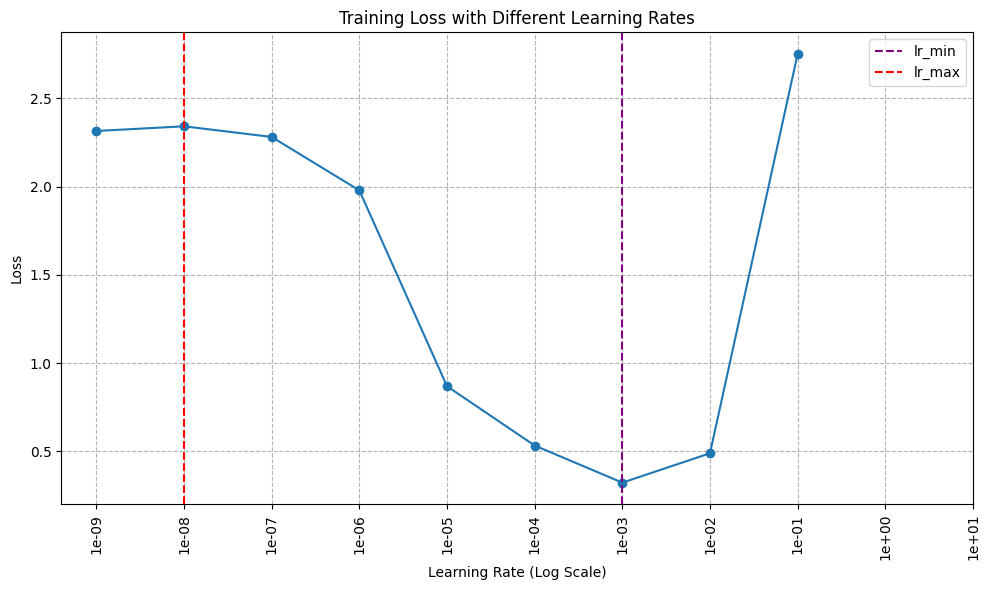

In [10]:
# for standard normalization + adam optimizer
# Determine lr_min from the minimum of the losses
lr_min = lrs[losses.index(min(losses))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lrs[:-2], losses[:-2], marker='o')  # Use losses directly here
plt.xscale('log')
plt.xticks(lrs, [f"{val:.0e}" for val in lrs], rotation=90)
plt.axvline(x=lr_min, label='lr_min', linestyle='dashed', color='purple')
plt.axvline(x=1e-8, label='lr_max', linestyle='dashed', color='red')
plt.legend()
plt.xlabel('Learning Rate (Log Scale)')
plt.ylabel('Loss')
plt.title('Training Loss with Different Learning Rates')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

## 5.2

In [ ]:
# for bn + sgd model
from keras.callbacks import LearningRateScheduler
import numpy as np

def clr_exp_decay(epoch, lr_min, lr_max, total_epochs, decay=0.01):
    cycle = np.pi * (epoch / total_epochs)
    return lr_min + 0.5 * (lr_max - lr_min) * (1 + np.cos(cycle)) * np.exp(-decay * epoch)

# Define the learning rate scheduler
lr_scheduler = LearningRateScheduler(lambda epoch: clr_exp_decay(epoch, lr_min, 1e-8, 10))


In [ ]:
model = lenet5_with_bn_input()
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), callbacks=[lr_scheduler])

Epoch 1/10
938/938 [==============================] - 12s 11ms/step - loss: 3.5691 - accuracy: 0.0657 - val_loss: 3.5876 - val_accuracy: 0.0660 - lr: 1.0000e-08
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.7087 - accuracy: 0.7590 - val_loss: 0.5631 - val_accuracy: 0.8000 - lr: 0.0034
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.4889 - accuracy: 0.8269 - val_loss: 0.4873 - val_accuracy: 0.8235 - lr: 0.0113
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.4170 - accuracy: 0.8494 - val_loss: 0.4175 - val_accuracy: 0.8497 - lr: 0.0230
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3681 - accuracy: 0.8662 - val_loss: 0.3699 - val_accuracy: 0.8641 - lr: 0.0371
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3347 - accuracy: 0.8778 - val_loss: 0.3734 - val_accuracy: 0.8667 - lr: 0.0524
Epoch 7/10
938/938 [==============================] - 7s 7ms/st

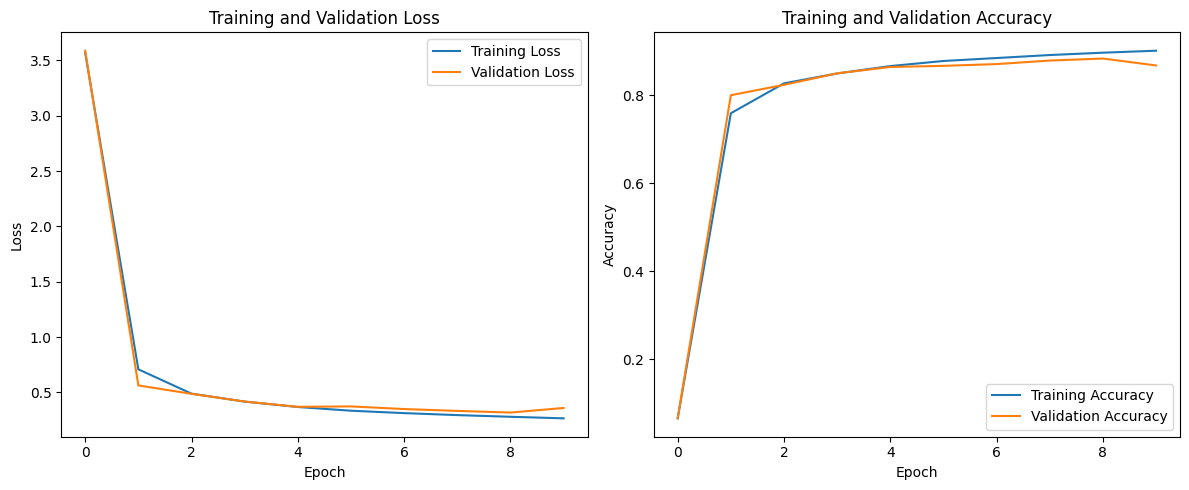

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Answer:** Note that the validation loss and accuracy don't always follow the training loss and accuracy. For instance, in the 5th epoch, even though the training loss decreased compared to the 4th epoch, the validation loss increased. This is a sign that the model might be starting to overfit to the training data.

## 5.3

In [ ]:
lrmax = 1e-8
batch_sizes = [2**i for i in range(1, 13)]
training_losses = []

# Train the model for each batch size
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")

    model = lenet5_with_bn_input()
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lrmax),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    training_losses.append(history.history['loss'][-1])


Training with batch size: 2
Epoch 1/5
30000/30000 [==============================] - 185s 6ms/step - loss: 3.1040 - accuracy: 0.0921 - val_loss: 3.3558 - val_accuracy: 0.0890
Epoch 2/5
30000/30000 [==============================] - 184s 6ms/step - loss: 3.0962 - accuracy: 0.0929 - val_loss: 3.3037 - val_accuracy: 0.0884
Epoch 3/5
30000/30000 [==============================] - 191s 6ms/step - loss: 3.0851 - accuracy: 0.0915 - val_loss: 3.3085 - val_accuracy: 0.0786
Epoch 4/5
30000/30000 [==============================] - 189s 6ms/step - loss: 3.0695 - accuracy: 0.0942 - val_loss: 3.2781 - val_accuracy: 0.0794
Epoch 5/5
30000/30000 [==============================] - 181s 6ms/step - loss: 3.0628 - accuracy: 0.0921 - val_loss: 3.2854 - val_accuracy: 0.0841
Training with batch size: 4
Epoch 1/5
15000/15000 [==============================] - 94s 6ms/step - loss: 2.8452 - accuracy: 0.1212 - val_loss: 2.8388 - val_accuracy: 0.1333
Epoch 2/5
15000/15000 [==============================] - 91s 6m

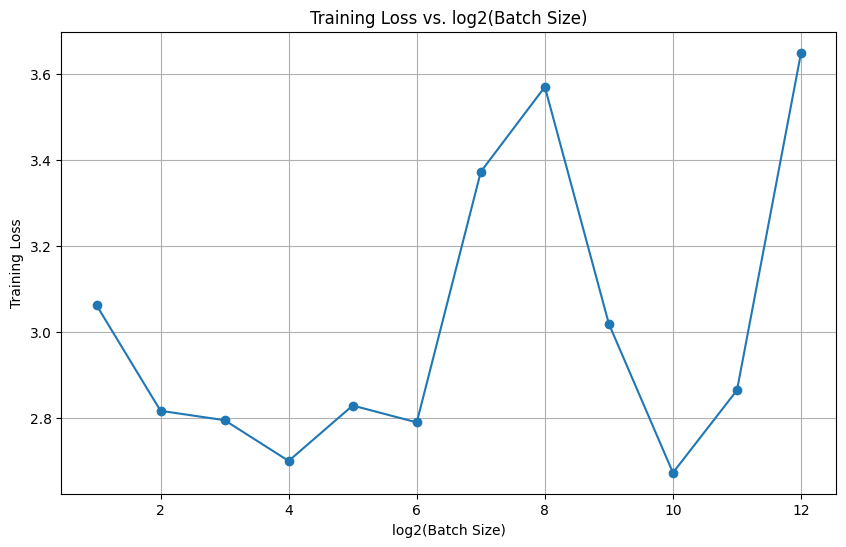

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.log2(batch_sizes), training_losses, marker='o')
plt.xlabel('log2(Batch Size)')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. log2(Batch Size)')
plt.grid(True)
plt.show()

**Answer:** From the runtime data, we observe that as the batch size increases, the number of iterations per epoch decreases. Smaller batch sizes tend to have noisier updates; Larger batch sizes provide more stable gradient updates but might converge to sharp minima. However, there is little imformation we can conclude from the graph. The flctuation in training loss increases as batch size increases, potentially due to the tendency of converging to local minima.

In [11]:
# for standard normalization + adam optimizer
lrmax = 1e-8
batch_sizes = [2**i for i in range(1, 13)]
training_losses = []

# Train the model for each batch size
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")

    model = lenet5()
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    training_losses.append(history.history['loss'][-1])

Training with batch size: 2
Epoch 1/5
30000/30000 [==============================] - 100s 3ms/step - loss: 826.4950 - accuracy: 0.1026 - val_loss: 765.9752 - val_accuracy: 0.1000
Epoch 2/5
30000/30000 [==============================] - 98s 3ms/step - loss: 826.5312 - accuracy: 0.0974 - val_loss: 1682.9786 - val_accuracy: 0.1000
Epoch 3/5
30000/30000 [==============================] - 98s 3ms/step - loss: 834.0715 - accuracy: 0.0979 - val_loss: 703.6094 - val_accuracy: 0.1000
Epoch 4/5
30000/30000 [==============================] - 98s 3ms/step - loss: 818.6674 - accuracy: 0.0987 - val_loss: 796.3196 - val_accuracy: 0.1000
Epoch 5/5
30000/30000 [==============================] - 98s 3ms/step - loss: 826.3312 - accuracy: 0.1011 - val_loss: 948.0169 - val_accuracy: 0.1000
Training with batch size: 4
Epoch 1/5
15000/15000 [==============================] - 51s 3ms/step - loss: 657.9297 - accuracy: 0.1006 - val_loss: 705.9568 - val_accuracy: 0.1000
Epoch 2/5
15000/15000 [===================

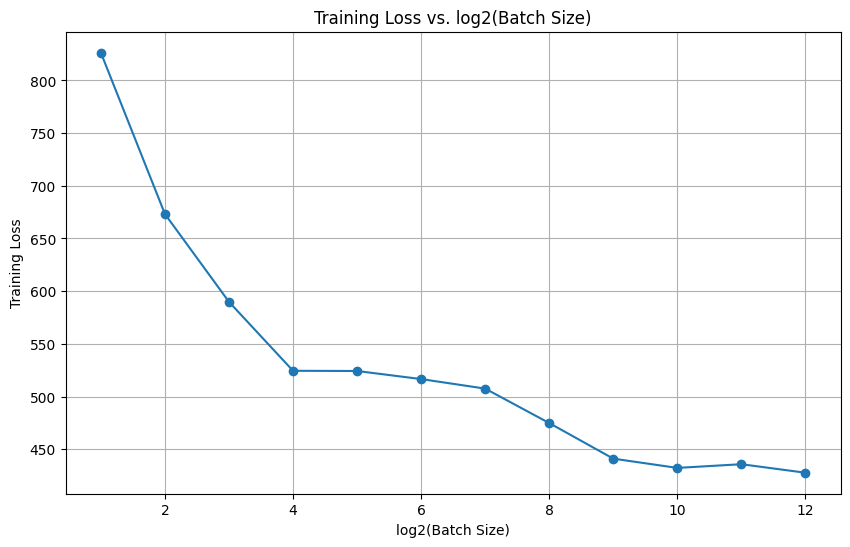

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.log2(batch_sizes), training_losses, marker='o')
plt.xlabel('log2(Batch Size)')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. log2(Batch Size)')
plt.grid(True)
plt.show()

As the batch size increases, the number of steps per epoch decreases. This is expected since the batch size is inversely proportional to the number of steps per epoch. However, the loss doesn't show a consistent trend with increasing batch size, and it seems to be converging to a high loss. The result is very different from the other model that uses bn input and sgd optimization.